## We implement a linear regression model with our own gradient descent module on example data (ex1data1.mat).
- Then we calculate the parameters (a, b) in a line function y = ax+b via linear regression model.
- Finally we will plot the output line and the input data in the same figure. Plot the cost curve.

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
#plt.style.available # To check all available matplotlib styles
plt.style.use('ggplot')

In [111]:
# Visualizing the dataset
x_feat = []
y_target = []

with open('data/ex1data1.mat', 'r') as ex1_d1:
    for line in ex1_d1:
        line = line.strip().split(',')
        x_feat.append(float(line[0]))
        y_target.append(float(line[1]))
        
# Converting feature and target data to np arrays
x_feat, y_target = np.array(x_feat), np.array(y_target)
print("No. of samples in dataset:", len(x_feat))

No. of samples in dataset: 97


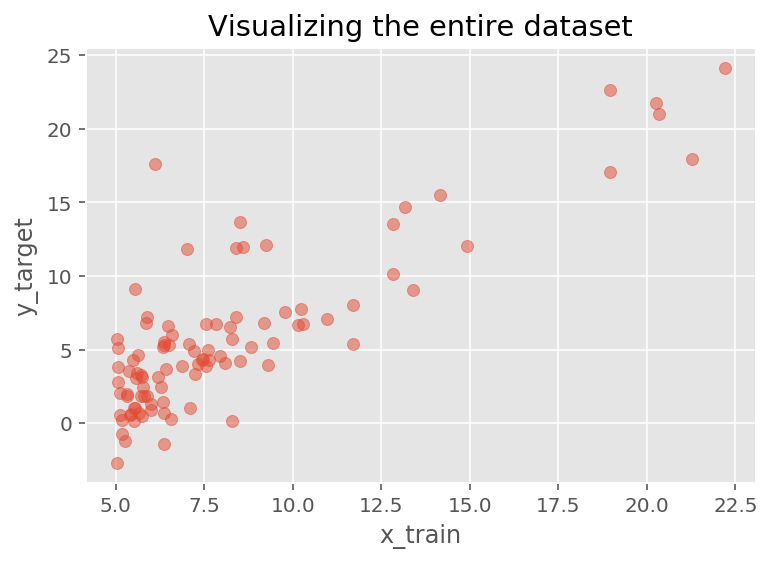

In [112]:
plt.scatter(x_feat, y_target, alpha=0.5)
plt.xlabel('x_train')
plt.ylabel('y_target')
plt.title("Visualizing the entire dataset")
plt.show()

In [129]:
# Prediction linear or hypothesis function
def y_pred(x_feat, theta_0, theta_1):
    '''theta_0 and theta_1 are the parameters for this linear model which represent 
        the y-intercept and slope of the straight line.'''
    return theta_0 + (theta_1*x_feat)

# Cost function Mean Squared Error
def mse(y_true, y_pred):
    return (((y_true - y_pred)**2).mean())/2

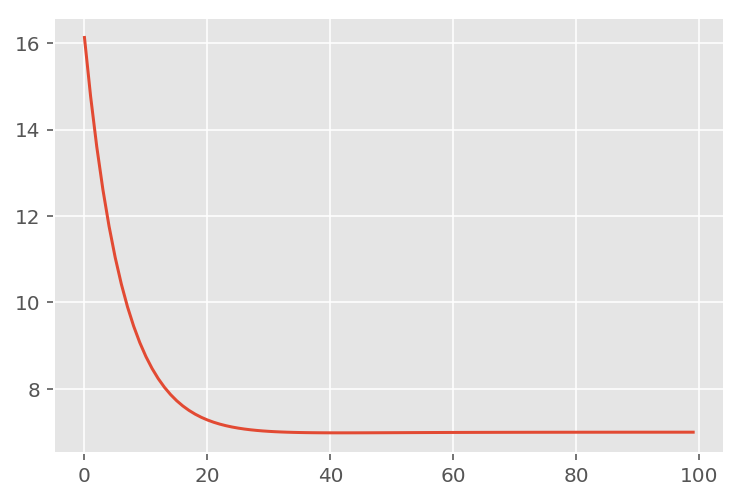

In [150]:
learning_rate = 0.005
epochs = 100
mse_loss = []

# initialize the two params to some random values
theta_0 = np.random.random() * 10
theta_1 = np.random.random()

for epoch in range(epochs):
    for xf, yt in zip(x_feat, y_target):
        # Simultaneous update of parameters
        dm_dt0 = (y_pred(xf, theta_0, theta_1) - yt)
        dm_dt1 = xf * (y_pred(xf, theta_0, theta_1) - yt)
        theta_0 -= learning_rate * dm_dt0
        theta_1 -= learning_rate * dm_dt1  
#       print(mse(y_target, y_pred(x_feat, theta_0, theta_1)))
    mse_loss.append(mse(y_target, y_pred(x_feat, theta_0, theta_1)))


plt.plot(mse_loss)

In [153]:
print(theta_0, theta_1)

-3.91237085032816 0.9457335196055452


The MSE for the following line is 6.999810995718302


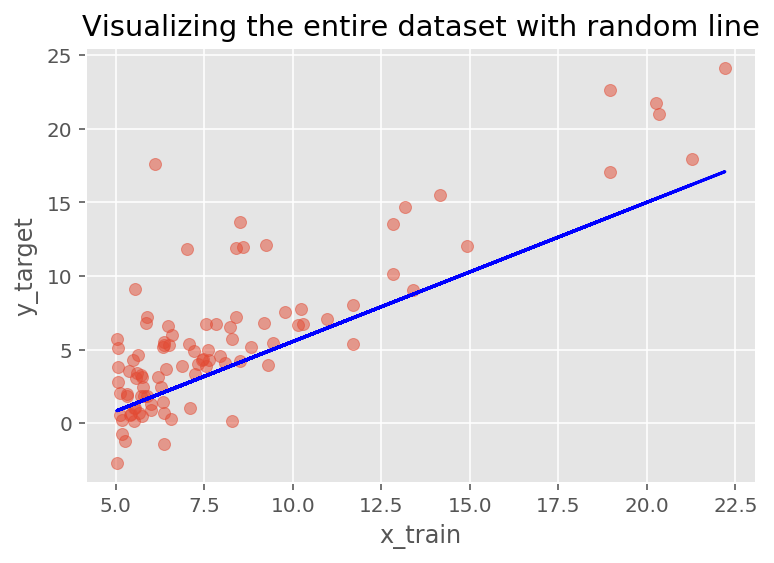

In [156]:
# Running the mse test with the line predicted by the trained model
print("The MSE for the following line is", mse(y_target, y_pred(x_feat, theta_0, theta_1)))

plt.scatter(x_feat, y_target, alpha=0.5)
plt.plot(x_feat, theta_0 + theta_1*x_feat, color='b')
plt.xlabel('x_train')
plt.ylabel('y_target')
plt.title("Visualizing the entire dataset with random line")
plt.show()

In [160]:
# Running the model generation with scikit learn
# import numpy as np
# from sklearn.linear_model import LinearRegression

# X = x_feat.reshape(-1, 1) 
# reg = LinearRegression().fit(X, y_target)
# reg.score(X, y_target)
# reg.coef_

array([1.19303364])